# NumPy Basics: Arrays and Vectorized Computation

NumPy, short for Numerical Python, is one of the most important foundational packages
for numerical computing in Python. Most computational packages providing
scientific functionality use NumPy’s array objects as the *lingua franca* for data
exchange.

Here are some of the things you’ll find in NumPy:
- ndarray, an efficient multidimensional array providing fast array-oriented arithmetic
operations and flexible broadcasting capabilities.
- Mathematical functions for fast operations on entire arrays of data without having
to write loops.
- Tools for reading/writing array data to disk and working with memory-mapped
files.
- Linear algebra, random number generation, and Fourier transform capabilities.
- A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

In [ ]:
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

One of the reasons NumPy is so important for numerical computations in Python is
because it is designed for efficiency on large arrays of data. There are a number of
reasons for this:
- NumPy internally stores data in a contiguous block of memory, independent of
other built-in Python objects. NumPy’s library of algorithms written in the C language
can operate on this memory without any type checking or other overhead.
NumPy arrays also use much less memory than built-in Python sequences.
- NumPy operations perform complex computations on entire arrays without the
need for Python for loops.

To give you an idea of the performance difference, consider a NumPy array of one
million integers, and the equivalent Python list:

In [2]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [3]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 13.8 ms, sys: 7.67 ms, total: 21.5 ms
Wall time: 19.5 ms
CPU times: user 674 ms, sys: 203 ms, total: 877 ms
Wall time: 890 ms


## The NumPy ndarray: A Multidimensional Array Object

One of the key features of NumPy is its N-dimensional array object, or ndarray,
which is a fast, flexible container for large datasets in Python. Arrays enable you to
perform mathematical operations on whole blocks of data using similar syntax to the
equivalent operations between scalar elements.

To give you a flavor of how NumPy enables batch computations with similar syntax
to scalar values on built-in Python objects, I first import NumPy and generate a small
array of random data:

In [1]:
import numpy as np
# Generate some random data
data = np.random.randn(2, 3)
data

array([[-2.29633764, -0.02107241, -0.64702008],
       [ 2.11385349,  0.12913125, -0.52243329]])

In the first example, all of the elements have been multiplied by 10. In the second, the
corresponding values in each “cell” in the array have been added to each other.

In [2]:
data * 10

array([[-22.96337641,  -0.2107241 ,  -6.47020084],
       [ 21.13853485,   1.29131246,  -5.22433288]])

In [3]:
data + data

array([[-4.59267528, -0.04214482, -1.29404017],
       [ 4.22770697,  0.25826249, -1.04486658]])

An ndarray is a generic multidimensional container for homogeneous data; that is, all
of the elements must be the same type. Every array has a **shape**, a tuple indicating the
size of each dimension, and a **dtype**, an object describing the data type of the array:

In [7]:
data.shape

(2, 3)

In [8]:
data.dtype

dtype('float64')

### Creating ndarrays

The easiest way to create an array is to use the array function. This accepts any
sequence-like object (including other arrays) and produces a new NumPy array containing
the passed data. For example, a list is a good candidate for conversion:

In [9]:
data1 = [6, 7.5, 8, 0, 1]

In [10]:
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

Nested sequences, like a list of equal-length lists, will be converted into a multidimensional
array:

In [11]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [12]:
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions with shape
inferred from the data. We can confirm this by inspecting the ndim and shape
attributes:

In [13]:
arr2.ndim

2

In [14]:
arr2.shape

(2, 4)

Unless explicitly specified (more on this later), np.array tries to infer a good data
type for the array that it creates. The data type is stored in a special dtype metadata
object; for example, in the previous two examples we have:

In [15]:
arr1.dtype

dtype('float64')

In [16]:
arr2.dtype

dtype('int64')

In addition to np.array, there are a number of other functions for creating new
arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a
given length or shape. empty creates an array without initializing its values to any particular
value. To create a higher dimensional array with these methods, pass a tuple
for the shape:

In [17]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
np.ones((3, 6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [23]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

**arange** is an array-valued version of the built-in Python range function:

### Data Types for ndarrays

The data type or dtype is a special object containing the information (or metadata,
data about data) the ndarray needs to interpret a chunk of memory as a particular
type of data:

In [8]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [9]:
arr1.dtype

dtype('float64')

In [10]:
arr2.dtype

dtype('int32')

In [11]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [12]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

dtypes are a source of NumPy’s flexibility for interacting with data coming from other
systems. The numerical dtypes are named the same way: a type name, like float or int, followed
by a number indicating the number of bits per element. 

A standard doubleprecision
floating-point value (what’s used under the hood in Python’s float object)
takes up 8 bytes or 64 bits. Thus, this type is known in NumPy as float64.

In [27]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

You can explicitly convert or cast an array from one dtype to another using ndarray’s
astype method:

In this example, integers were cast to floating point. If I cast some floating-point
numbers to be of integer dtype, the decimal part will be truncated:

In [28]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

If you have an array of strings representing numbers, you can use astype to convert
them to numeric form:

In [29]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

If casting were to fail for some reason (like a string that cannot be converted to
float64), a ValueError will be raised. Here I was a bit lazy and wrote float instead
of np.float64; NumPy aliases the Python types to its own equivalent data dtypes.

In [30]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

There are shorthand type code strings you can also use to refer to a dtype:

In [31]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Arithmetic with NumPy Arrays

Arrays are important because they enable you to express batch operations on data
without writing any for loops. NumPy users call this vectorization. Any arithmetic
operations between equal-size arrays applies the operation element-wise:

In [32]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [33]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [34]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

Arithmetic operations with scalars propagate the scalar argument to each element in
the array:

In [35]:
1 / arr

array([[1.    , 0.5   , 0.3333],
       [0.25  , 0.2   , 0.1667]])

In [36]:
arr ** 0.5

array([[1.    , 1.4142, 1.7321],
       [2.    , 2.2361, 2.4495]])

Comparisons between arrays of the same size yield boolean arrays:

In [37]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [38]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### Basic Indexing and Slicing

NumPy array indexing is a rich topic, as there are many ways you may want to select
a subset of your data or individual elements. One-dimensional arrays are simple; on
the surface they act similarly to Python lists:

In [39]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
arr[5]

5

In [41]:
arr[5:8]

array([5, 6, 7])

In [42]:
arr[5:8] = 12

In [43]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

As you can see, if you assign a scalar value to a slice, as in arr[5:8] = 12, the value is
propagated (or broadcasted henceforth) to the entire selection. An important first distinction
from Python’s built-in lists is that array slices are views on the original array.
This means that the data is not copied, and any modifications to the view will be
reflected in the source array.

In [44]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

when we change values in arr_slice, the mutations are reflected in the original
array arr:

In [46]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The “bare” slice [:] will assign to all values in an array:

In [47]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

As NumPy has been
designed to be able to work with very large arrays, you could imagine performance
and memory problems if NumPy insisted on always copying data.

With higher dimensional arrays, you have many more options. In a two-dimensional
array, the elements at each index are no longer scalars but rather one-dimensional
arrays:

In [48]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

Thus, individual elements can be accessed recursively. But that is a bit too much
work, so you can pass a comma-separated list of indices to select individual elements.
So these are equivalent:

In [49]:
arr2d[0][2]

3

In [50]:
arr2d[0, 2]

3

In multidimensional arrays, if you omit later indices, the returned object will be a
lower dimensional ndarray consisting of all the data along the higher dimensions. So
in the 2 × 2 × 3 array arr3d:

In [51]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 × 3 array:

In [52]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

Both scalar values and arrays can be assigned to arr3d[0]:

In [53]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [54]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, arr3d[1, 0] gives you all of the values whose indices start with (1, 0),
forming a 1-dimensional array:

In [56]:
arr3d[1, 0]

array([7, 8, 9])

This expression is the same as though we had indexed in two steps:

In [57]:
x = arr3d[1]
x

array([[ 7,  8,  9],
       [10, 11, 12]])

In [58]:
x[0]

array([7, 8, 9])

Note that in all of these cases where subsections of the array have been selected, the
returned arrays are views.

#### Indexing with slices

Like one-dimensional objects such as Python lists, ndarrays can be sliced with the
familiar syntax:

In [60]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [61]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

Consider the two-dimensional array from before, arr2d. Slicing this array is a bit
different:

In [62]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [63]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

As you can see, it has sliced along axis 0, the first axis. A slice, therefore, selects a
range of elements along an axis. It can be helpful to read the expression arr2d[:2] as
“select the first two rows of arr2d.”

In [64]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

When slicing like this, you always obtain array views of the same number of dimensions.
By mixing integer indexes and slices, you get lower dimensional slices.

We can select the second row but only the first two columns

In [65]:
arr2d[1, :2]

array([4, 5])

We can select the third column but only the first two rows like so:

In [66]:
arr2d[:2, 2]

array([3, 6])

Note that a colon by itself means to take the entire
axis, so you can slice only higher dimensional axes by doing:

In [67]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

Of course, assigning to a slice expression assigns to the whole selection:

In [68]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Boolean Indexing

Let’s consider an example where we have some data in an array and an array of names
with duplicates. We are going to use here the randn function in **numpy.random** to generate
some random normally distributed data:

In [69]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [70]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [71]:
data

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

Suppose each name corresponds to a row in the data array and we wanted to select
all the rows with corresponding name 'Bob'. Like arithmetic operations, comparisons
(such as ==) with arrays are also vectorized. Thus, comparing names with the
string 'Bob' yields a boolean array:

In [72]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

This boolean array can be passed when indexing the array:

In [73]:
data[names == 'Bob']

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.669 , -0.4386, -0.5397,  0.477 ]])

The boolean array must be of the same length as the array axis it’s indexing. You can
even mix and match boolean arrays with slices or integers:

In [74]:
data[names == 'Bob', 2:]

array([[ 0.769 ,  1.2464],
       [-0.5397,  0.477 ]])

In [75]:
data[names == 'Bob', 3]

array([1.2464, 0.477 ])

To select everything but 'Bob', you can either use != or negate the condition using ~:

In [76]:
names != 'Bob'
data[~(names == 'Bob')]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

The ~ operator can be useful when you want to invert a general condition:

In [77]:
cond = names == 'Bob'
data[~cond]

array([[ 1.0072, -1.2962,  0.275 ,  0.2289],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 3.2489, -1.0212, -0.5771,  0.1241],
       [ 0.3026,  0.5238,  0.0009,  1.3438],
       [-0.7135, -0.8312, -2.3702, -1.8608]])

Selecting two of the three names to combine multiple boolean conditions, use
boolean arithmetic operators like & (and) and | (or):

In [78]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [79]:
data[mask]

array([[ 0.0929,  0.2817,  0.769 ,  1.2464],
       [ 1.3529,  0.8864, -2.0016, -0.3718],
       [ 1.669 , -0.4386, -0.5397,  0.477 ],
       [ 3.2489, -1.0212, -0.5771,  0.1241]])

Selecting data from an array by boolean indexing always creates a copy of the data,
even if the returned array is unchanged.

Setting values with boolean arrays works in a common-sense way. To set all of the
negative values in data to 0 we need only do:

In [80]:
data[data < 0] = 0
data

array([[0.0929, 0.2817, 0.769 , 1.2464],
       [1.0072, 0.    , 0.275 , 0.2289],
       [1.3529, 0.8864, 0.    , 0.    ],
       [1.669 , 0.    , 0.    , 0.477 ],
       [3.2489, 0.    , 0.    , 0.1241],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

Setting whole rows or columns using a one-dimensional boolean array is also easy:

In [81]:
data[names != 'Joe'] = 7
data

array([[7.    , 7.    , 7.    , 7.    ],
       [1.0072, 0.    , 0.275 , 0.2289],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [7.    , 7.    , 7.    , 7.    ],
       [0.3026, 0.5238, 0.0009, 1.3438],
       [0.    , 0.    , 0.    , 0.    ]])

### Fancy Indexing

Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.
Suppose we had an 8 × 4 array:

In [82]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or
ndarray of integers specifying the desired order:

In [83]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

Using negative indices selects rows from
the end:

In [84]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it selects a onedimensional
array of elements corresponding to each tuple of indices:

In [85]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [86]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected. Regardless of
how many dimensions the array has (here, only 2), the result of fancy indexing is
always one-dimensional.

The behavior of fancy indexing in this case is a bit different from what some users
might have expected (myself included), which is the rectangular region formed by
selecting a subset of the matrix’s rows and columns.

In [87]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing Arrays and Swapping Axes

Transposing is a special form of reshaping that similarly returns a view on the underlying
data without copying anything. Arrays have the **transpose** method and also the
special T attribute:

In [88]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [89]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

When doing matrix computations, you may do this very often—for example, when
computing the inner matrix product using np.dot:

In [91]:
arr = np.random.randn(6, 3)
arr

array([[-0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329],
       [-2.3594, -0.1995, -1.542 ],
       [-0.9707, -1.307 ,  0.2863],
       [ 0.378 , -0.7539,  0.3313],
       [ 1.3497,  0.0699,  0.2467]])

In [92]:
np.dot(arr.T, arr)

array([[ 9.2291,  0.9394,  4.948 ],
       [ 0.9394,  3.7662, -1.3622],
       [ 4.948 , -1.3622,  4.3437]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute
the axes (for extra mind bending):

In [93]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [94]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Simple transposing with .T is a special case of swapping axes. ndarray has the method
swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange
the data:

In [95]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [96]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast Element-Wise Array Functions

A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.

In [97]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
np.sqrt(arr)

array([0.    , 1.    , 1.4142, 1.7321, 2.    , 2.2361, 2.4495, 2.6458,
       2.8284, 3.    ])

In [99]:
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

These are referred to as unary ufuncs. Others, such as add or maximum, take two arrays
(thus, binary ufuncs) and return a single array as the result:

In [100]:
x = np.random.randn(8)
y = np.random.randn(8)

In [101]:
x

array([-0.0119,  1.0048,  1.3272, -0.9193, -1.5491,  0.0222,  0.7584,
       -0.6605])

In [102]:
y

array([ 0.8626, -0.01  ,  0.05  ,  0.6702,  0.853 , -0.9559, -0.0235,
       -2.3042])

In [103]:
np.maximum(x, y)

array([ 0.8626,  1.0048,  1.3272,  0.6702,  0.853 ,  0.0222,  0.7584,
       -0.6605])

## Array-Oriented Programming with Arrays

Using NumPy arrays enables you to express many kinds of data processing tasks as
concise array expressions that might otherwise require writing loops. This practice of
replacing explicit loops with array expressions is commonly referred to as vectorization.
In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, with the biggest impact in
any kind of numerical computations.

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2)
across a regular grid of values. The np.meshgrid function takes two 1D arrays and
produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [111]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would
write with two points:

In [112]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.0711, 7.064 , 7.0569, ..., 7.0499, 7.0569, 7.064 ],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       ...,
       [7.0499, 7.0428, 7.0357, ..., 7.0286, 7.0357, 7.0428],
       [7.0569, 7.0499, 7.0428, ..., 7.0357, 7.0428, 7.0499],
       [7.064 , 7.0569, 7.0499, ..., 7.0428, 7.0499, 7.0569]])

We can use matplotlib to create visualizations of this twodimensional
array:

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

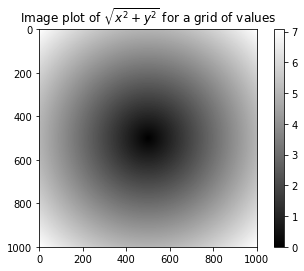

In [119]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [121]:
plt.close('all')

### Expressing Conditional Logic as Array Operations

The numpy.where function is a vectorized version of the ternary expression x if con
dition else y. Suppose we had a boolean array and two arrays of values:

In [122]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in
cond is True, and otherwise take the value from yarr. A list comprehension doing
this might look like:

In [123]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all
the work is being done in interpreted Python code). Second, it will not work with
multidimensional arrays. With np.where you can write this very concisely:

In [124]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to np.where don’t need to be arrays; one or both of
them can be scalars. A typical use of where in data analysis is to produce a new array
of values based on another array.

Suppose you had a matrix of randomly generated
data and you wanted to replace all positive values with 2 and all negative values with
–2. This is very easy to do with np.where:

In [125]:
arr = np.random.randn(4, 4)
arr

array([[-0.2047,  0.4789, -0.5194, -0.5557],
       [ 1.9658,  1.3934,  0.0929,  0.2817],
       [ 0.769 ,  1.2464,  1.0072, -1.2962],
       [ 0.275 ,  0.2289,  1.3529,  0.8864]])

In [126]:
arr > 0

array([[False,  True, False, False],
       [ True,  True,  True,  True],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

In [127]:
np.where(arr > 0, 2, -2)

array([[-2,  2, -2, -2],
       [ 2,  2,  2,  2],
       [ 2,  2,  2, -2],
       [ 2,  2,  2,  2]])

You can combine scalars and arrays when using np.where. For example, I can replace
all positive values in arr with the constant 2 like so:

In [ ]:
np.where(arr > 0, 2, arr) # set only positive values to 2

### Mathematical and Statistical Methods

A set of mathematical functions that compute statistics about an entire array or about
the data along an axis are accessible as methods of the array class. You can use aggregations
(often called reductions) like sum, mean, and std (standard deviation) either by
calling the array instance method or using the top-level NumPy function.

In [128]:
arr = np.random.randn(5, 4)
arr

array([[-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238],
       [ 0.0009,  1.3438, -0.7135, -0.8312],
       [-2.3702, -1.8608, -0.8608,  0.5601]])

In [129]:
arr.mean()

-0.1668098355461008

In [130]:
np.mean(arr)

-0.1668098355461008

In [131]:
arr.sum()

-3.3361967109220156

Functions like mean and sum take an optional axis argument that computes the statistic
over the given axis, resulting in an array with one fewer dimension:

In [132]:
arr.mean(axis=1)

array([-0.2858,  0.5412,  0.0934, -0.05  , -1.1329])

Here, arr.mean(1) means “compute mean across the columns” where arr.sum(0)
means “compute sum down the rows.”

In [133]:
arr.sum(axis=0)

array([-5.4878, -0.2877,  3.6463, -1.207 ])

Other methods like cumsum and cumprod do not aggregate, instead producing an array
of the intermediate results:

In [134]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In multidimensional arrays, accumulation functions like cumsum return an array of
the same size, but with the partial aggregates computed along the indicated axis
according to each lower dimensional slice:

In [135]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [136]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [137]:
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus,
sum is often used as a means of counting True values in a boolean array:

In [138]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

50

There are two additional methods, any and all, useful especially for boolean arrays.
any tests whether one or more values in an array is True, while all checks if every
value is True:

In [139]:
bools = np.array([False, False, True, False])

In [140]:
bools.any()

True

In [141]:
bools.all()

False

These methods also work with non-boolean arrays, where non-zero elements evaluate
to True.

### Sorting
Like Python’s built-in list type, NumPy arrays can be sorted in-place with the sort
method:

In [142]:
arr = np.random.randn(6)
arr

array([ 1.3067, -0.4406, -0.3014,  0.4988, -0.824 ,  1.3206])

In [143]:
arr.sort()
arr

array([-0.824 , -0.4406, -0.3014,  0.4988,  1.3067,  1.3206])

You can sort each one-dimensional section of values in a multidimensional array inplace
along an axis by passing the axis number to sort:

In [144]:
arr = np.random.randn(5, 3)
arr

array([[ 0.508 , -0.6534,  0.187 ],
       [-0.3917, -0.2723, -0.0171],
       [ 0.6803,  0.6355, -0.7572],
       [ 0.7181, -0.3043, -1.6778],
       [ 0.427 , -1.5637, -0.3675]])

In [145]:
arr.sort(1)
arr

array([[-0.6534,  0.187 ,  0.508 ],
       [-0.3917, -0.2723, -0.0171],
       [-0.7572,  0.6355,  0.6803],
       [-1.6778, -0.3043,  0.7181],
       [-1.5637, -0.3675,  0.427 ]])

The top-level method np.sort returns a sorted copy of an array instead of modifying
the array in-place. A quick-and-dirty way to compute the quantiles of an array is to
sort it and select the value at a particular rank:

In [146]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.496216295671384

### Unique and Other Set Logic

NumPy has some basic set operations for one-dimensional ndarrays. A commonly
used one is np.unique, which returns the sorted unique values in an array:

In [147]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [148]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [149]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [150]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True])

Contrast np.unique with the pure Python alternative

Another function, np.in1d, tests membership of the values in one array in another,
returning a boolean array:

## File Input and Output with Arrays

NumPy is able to save and load data to and from disk either in text or binary format.

np.save and np.load are the two workhorse functions for efficiently saving and loading
array data on disk. Arrays are saved by default in an uncompressed raw binary
format with file extension .npy:

In [151]:
arr = np.arange(10)
np.save('some_array', arr)

If the file path does not already end in .npy, the extension will be appended. The array
on disk can then be loaded with np.load:

In [153]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You save multiple arrays in an uncompressed archive using np.savez and passing the
arrays as keyword arguments:

In [154]:
np.savez('array_archive.npz', a=arr, b=arr)

When loading an .npz file, you get back a dict-like object that loads the individual
arrays lazily:

In [156]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you may wish to use numpy.savez_compressed instead:

In [158]:
np.savez_compressed('arrays_compressed.npz', a=arr, b=arr)

In [159]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## Linear Algebra

Linear algebra, like matrix multiplication, decompositions, determinants, and other
square matrix math, is an important part of any array library. Unlike some languages
like MATLAB, multiplying two two-dimensional arrays with * is an element-wise
product instead of a matrix dot product. Thus, there is a function dot, both an array
method and a function in the numpy namespace, for matrix multiplication:

In [160]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [161]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [162]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [163]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

x.dot(y) is equivalent to np.dot(x, y):

In [164]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized onedimensional
array results in a one-dimensional array:

In [167]:
np.dot(x, np.ones(3))

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse
and determinant.

In [168]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)
mat = X.T.dot(X)

In [169]:
inv(mat)

array([[  0.9043,   2.7151,   0.1872,   0.5021,  -4.0683],
       [  2.7151,  12.4161,   1.002 ,   0.8236, -19.5015],
       [  0.1872,   1.002 ,   0.1995,   0.0767,  -1.6719],
       [  0.5021,   0.8236,   0.0767,   0.99  ,  -1.0414],
       [ -4.0683, -19.5015,  -1.6719,  -1.0414,  31.415 ]])

In [170]:
mat.dot(inv(mat))

array([[ 1.,  0.,  0., -0.,  0.],
       [-0.,  1.,  0.,  0.,  0.],
       [-0., -0.,  1.,  0.,  0.],
       [ 0.,  0., -0.,  1., -0.],
       [-0.,  0.,  0.,  0.,  1.]])

In [172]:
q, r = qr(mat)
r

array([[-6.4105,  3.828 , -2.3228,  2.0944,  1.4955],
       [ 0.    , -4.6142, -5.0595,  1.1911, -3.1099],
       [ 0.    ,  0.    , -8.3112,  0.0644, -0.4362],
       [ 0.    ,  0.    ,  0.    , -0.9741, -0.0365],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0268]])

## Pseudorandom Number Generation

The numpy.random module supplements the built-in Python random with functions
for efficiently generating whole arrays of sample values from many kinds of probability
distributions. For example, you can get a 4 × 4 array of samples from the standard
normal distribution using normal:

In [12]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.15085064, -0.15202838, -1.32538415, -0.3051757 ],
       [ 1.04575831, -0.06276965, -0.37238785, -0.68782127],
       [-0.05675785, -2.4003558 , -0.8015374 , -2.38249219],
       [-0.22845154,  1.11468217,  0.62874053,  0.63659744]])

Python’s built-in random module, by contrast, only samples one value at a time. As
you can see from this benchmark, numpy.random is well over an order of magnitude
faster for generating very large samples:

In [174]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]
%timeit np.random.normal(size=N)

790 ms ± 55.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
40.9 ms ± 160 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


The data generation functions in numpy.random use a global random seed. To avoid
global state, you can use numpy.random.RandomState to create a random number
generator isolated from others:

In [175]:
np.random.seed(1234)

In [176]:
rng = np.random.RandomState(1234)
rng.randn(10)

array([ 0.4714, -1.191 ,  1.4327, -0.3127, -0.7206,  0.8872,  0.8596,
       -0.6365,  0.0157, -2.2427])

## Example: Random Walks

The simulation of random walks provides an illustrative application of utilizing array
operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and
–1 occurring with equal probability.

Below is a single random walk with 1,000 steps using
the built-in random module:

In [177]:
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [178]:
plt.figure()

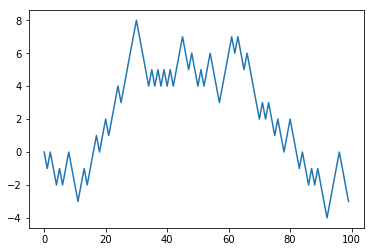

In [179]:
plt.plot(walk[:100])

In [180]:
np.random.seed(12345)

You might make the observation that walk is simply the cumulative sum of the random
steps and could be evaluated as an array expression. Thus, I use the np.random
module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the
cumulative sum:

In [181]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

From this we can begin to extract statistics like the minimum and maximum value
along the walk’s trajectory:

In [182]:
walk.min()

-3

In [183]:
walk.max()

31

Here we might want to know how long it took the
random walk to get at least 10 steps away from the origin 0 in either direction.
np.abs(walk) >= 10 gives us a boolean array indicating where the walk has reached
or exceeded 10, but we want the index of the first 10 or –10.

we can compute
this using argmax, which returns the first index of the maximum value in the
boolean array (True is the maximum value):

In [184]:
(np.abs(walk) >= 10).argmax()

37

### Simulating Many Random Walks at Once

If your goal was to simulate many random walks, say 5,000 of them, you can generate
all of the random walks with minor modifications to the preceding code. If passed a
2-tuple, the numpy.random functions will generate a two-dimensional array of draws,
and we can compute the cumulative sum across the rows to compute all 5,000 random
walks in one shot:

In [185]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ...,
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

Now, we can compute the maximum and minimum values obtained over all of the
walks:

In [187]:
walks.max()

138

In [188]:
walks.min()

-133

Out of these walks, let’s compute the minimum crossing time to 30 or –30. This is
slightly tricky because not all 5,000 of them reach 30. We can check this using the any
method:

In [189]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([False,  True, False, ..., False,  True, False])

In [190]:
hits30.sum() # Number that hit 30 or -30

3410

We can use this boolean array to select out the rows of walks that actually cross the
absolute 30 level and call argmax across axis 1 to get the crossing times:

In [191]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.8897360703812